In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
data=pd.read_csv('IOT-temp.csv')

In [49]:
data.columns

Index(['id', 'room_id/id', 'noted_date', 'temp', 'out/in'], dtype='object')

In [50]:
df=pd.DataFrame(data,columns=['room_id/id', 'noted_date', 'temp', 'out/in'])
df

,room_id/id,noted_date,temp,out/in
0,Room Admin,08-12-2018 09:30,29,In
1,Room Admin,08-12-2018 09:30,29,In
2,Room Admin,08-12-2018 09:29,41,Out
3,Room Admin,08-12-2018 09:29,41,Out
4,Room Admin,08-12-2018 09:29,31,In
...,...,...,...,...
97601,Room Admin,28-07-2018 07:07,31,In
97602,Room Admin,28-07-2018 07:07,31,In
97603,Room Admin,28-07-2018 07:06,31,In
97604,Room Admin,28-07-2018 07:06,31,In


In [51]:
df2=df.copy()

In [52]:
df2['temp']=df2['temp'].astype(str)

In [53]:
df2.describe()

,room_id/id,noted_date,temp,out/in
count,97606,97606,97606,97606
unique,1,27920,31,2
top,Room Admin,12-09-2018 03:09,39,Out
freq,97606,65,10203,77261


In [54]:
df3=df2.dropna()
df3

,room_id/id,noted_date,temp,out/in
0,Room Admin,08-12-2018 09:30,29,In
1,Room Admin,08-12-2018 09:30,29,In
2,Room Admin,08-12-2018 09:29,41,Out
3,Room Admin,08-12-2018 09:29,41,Out
4,Room Admin,08-12-2018 09:29,31,In
...,...,...,...,...
97601,Room Admin,28-07-2018 07:07,31,In
97602,Room Admin,28-07-2018 07:07,31,In
97603,Room Admin,28-07-2018 07:06,31,In
97604,Room Admin,28-07-2018 07:06,31,In


In [55]:
df3['temp']=df3['temp'].astype(int)

In [56]:
#missing value
len(df.index)-df3.count() 

room_id/id    0
noted_date    0
temp          0
out/in        0
dtype: int64

In [57]:
df3['temp'].max()

51

In [58]:
df3['temp'].min()

21

In [59]:
df3['temp'].mean()

35.05393111079237

In [60]:
df3['out/in'].value_counts()

Out    77261
In     20345
Name: out/in, dtype: int64

In [61]:
df3[df3['temp']==(df3['temp'].max())]['noted_date']

52557    30-09-2018 17:29
52563    30-09-2018 17:13
Name: noted_date, dtype: object

In [62]:
df3[df3['temp']==(df3['temp'].min())]['noted_date']

5759    03-12-2018 11:02
5760    03-12-2018 11:02
Name: noted_date, dtype: object

In [63]:
df3[df3['temp']==(int(df3['temp'].mean()))]['noted_date']

350      08-12-2018 03:50
351      08-12-2018 03:50
374      08-12-2018 03:20
375      08-12-2018 03:20
392      08-12-2018 03:06
               ...       
72824    11-09-2018 08:25
72830    11-09-2018 08:25
72840    11-09-2018 08:23
72857    11-09-2018 08:22
97441    02-08-2018 06:43
Name: noted_date, Length: 1582, dtype: object

In [64]:
df3[df3['temp']==25]['noted_date']

1306     07-12-2018 14:11
1307     07-12-2018 14:11
1756     07-12-2018 06:02
1757     07-12-2018 06:02
1758     07-12-2018 06:00
               ...       
90334    06-09-2018 07:49
90335    06-09-2018 07:48
90339    06-09-2018 07:47
90341    06-09-2018 07:47
90346    06-09-2018 07:46
Name: noted_date, Length: 224, dtype: object

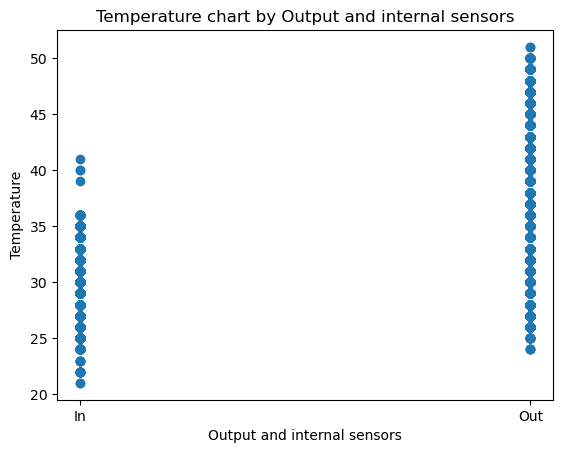

In [74]:
plt.title('Temperature chart by Output and internal sensors')
plt.scatter(df3['out/in'],df3['temp'])
plt.xlabel('Output and internal sensors')
plt.ylabel('Temperature')
plt.savefig('Temperature chart by Output and internal sensors.png')
plt.show()

In [66]:
date = df['noted_date'][0]
split_date = date.split('-')
number = split_date[0]  # عدد 9 در این حالت
print(number[1])

8


In [67]:
m=[]
for i in df['noted_date']:
    split_date = i.split('-')
    number = int(split_date[1])
    m.append(number)
    

In [68]:
df3['Month']=m

In [69]:
df3

,room_id/id,noted_date,temp,out/in,Month
0,Room Admin,08-12-2018 09:30,29,In,12
1,Room Admin,08-12-2018 09:30,29,In,12
2,Room Admin,08-12-2018 09:29,41,Out,12
3,Room Admin,08-12-2018 09:29,41,Out,12
4,Room Admin,08-12-2018 09:29,31,In,12
...,...,...,...,...,...
97601,Room Admin,28-07-2018 07:07,31,In,7
97602,Room Admin,28-07-2018 07:07,31,In,7
97603,Room Admin,28-07-2018 07:06,31,In,7
97604,Room Admin,28-07-2018 07:06,31,In,7


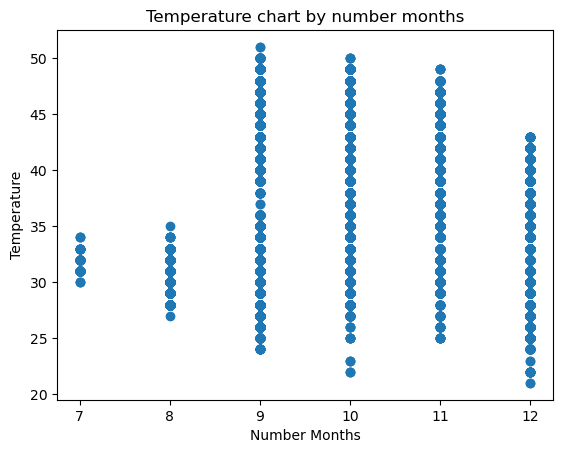

In [73]:
plt.title('Temperature chart by number months')
plt.scatter(df3['Month'],df3['temp'])
plt.xlabel('Number Months')
plt.ylabel('Temperature')
# plt.savefig('Temperature chart by months comlete in.png')
plt.show()

In [71]:
month = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]


In [72]:
months=[]
for i in m:
    months.append(month[i-1])


In [29]:
df3['name_months']=months

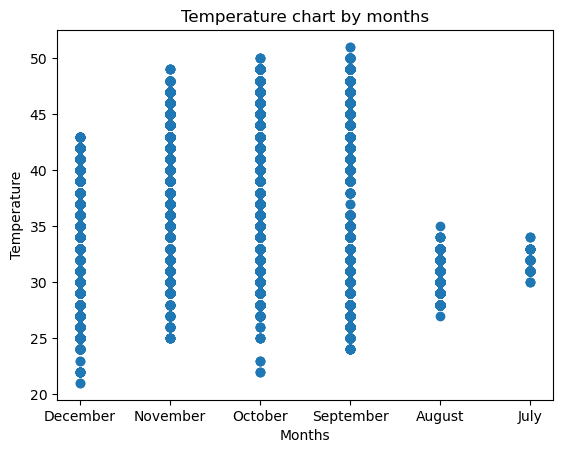

In [46]:
plt.title('Temperature chart by months')
plt.scatter(df3['name_months'],df3['temp'])
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.savefig('Temperature chart by months comlete in.png')
plt.show()

In [31]:
df3[df3['out/in']=='In']['name_months']

0        December
1        December
4        December
5        December
6        December
           ...   
97601        July
97602        July
97603        July
97604        July
97605        July
Name: name_months, Length: 20345, dtype: object

In [32]:
df3[df3['out/in']=='In']['temp']

0        29
1        29
4        31
5        31
6        29
         ..
97601    31
97602    31
97603    31
97604    31
97605    31
Name: temp, Length: 20345, dtype: int32

In [75]:
df3[df3['out/in']=='In']['temp'].value_counts()

32    3588
29    3498
31    3147
30    2657
28    2106
33    1733
27    1152
34    1119
35     620
26     378
25     198
24      62
36      57
22      19
23       5
21       2
40       2
39       1
41       1
Name: temp, dtype: int64

In [76]:
df3[df3['out/in']=='Out']['temp']

2        41
3        41
10       42
11       42
16       41
         ..
97587    32
97588    32
97594    32
97596    32
97599    32
Name: temp, Length: 77261, dtype: int32

In [77]:
df3[df3['out/in']=='Out']['temp'].value_counts()

39    10202
40     7796
28     6725
37     5723
29     4424
41     4353
31     4089
30     3957
36     3908
38     3867
27     3479
42     3447
43     2004
32     1820
44     1774
33     1704
45     1508
34     1494
46     1201
47     1044
48      971
35      962
49      401
26      321
50       55
25       26
24        4
51        2
Name: temp, dtype: int64

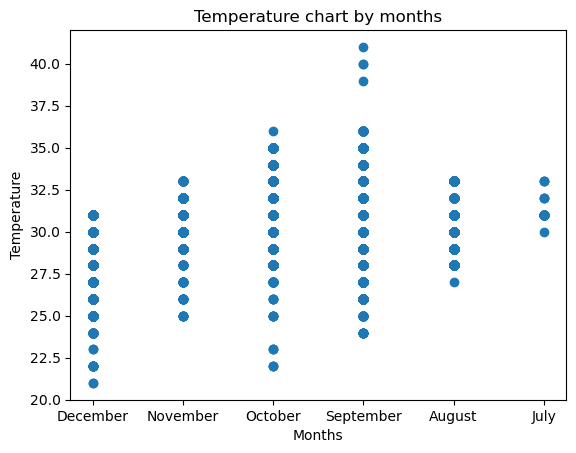

In [45]:
plt.title('Temperature chart by months')
plt.scatter(df3[df3['out/in']=='In']['name_months'],df3[df3['out/in']=='In']['temp'])
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.savefig('Temperature chart by months in.png')
plt.show()


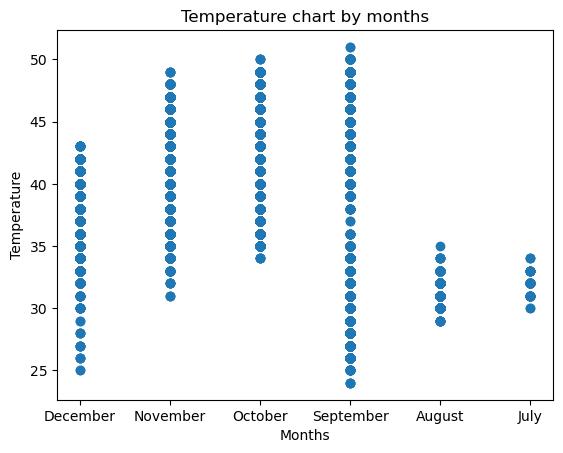

In [44]:
plt.title('Temperature chart by months')
plt.scatter(df3[df3['out/in']=='Out']['name_months'],df3[df3['out/in']=='Out']['temp'])
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.savefig('Temperature chart by months out.png')
plt.show()

In [35]:
d=[]
m=[]
y=[]
for i in df['noted_date']:
    split_date = i.split('-')
    day = int(split_date[0])
    month = int(split_date[1])
    year = split_date[2].split(' ')
    f=int(year[0])
    d.append(day)
    m.append(month)
    y.append(f)

In [36]:
type(m[0])

int

In [37]:
date=[]
for year, month, day in zip(y, m, d):
    formatted_date = f'{year:04d}-{month:02d}-{day:02d}'
    date.append(formatted_date)

In [38]:
df3['date']=date

In [39]:
df3

,room_id/id,noted_date,temp,out/in,Month,name_months,date
0,Room Admin,08-12-2018 09:30,29,In,12,December,2018-12-08
1,Room Admin,08-12-2018 09:30,29,In,12,December,2018-12-08
2,Room Admin,08-12-2018 09:29,41,Out,12,December,2018-12-08
3,Room Admin,08-12-2018 09:29,41,Out,12,December,2018-12-08
4,Room Admin,08-12-2018 09:29,31,In,12,December,2018-12-08
...,...,...,...,...,...,...,...
97601,Room Admin,28-07-2018 07:07,31,In,7,July,2018-07-28
97602,Room Admin,28-07-2018 07:07,31,In,7,July,2018-07-28
97603,Room Admin,28-07-2018 07:06,31,In,7,July,2018-07-28
97604,Room Admin,28-07-2018 07:06,31,In,7,July,2018-07-28


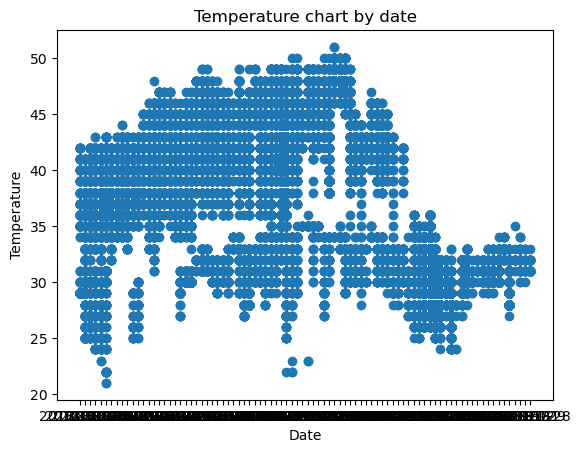

In [41]:
plt.title('Temperature chart by date')
plt.scatter(df3['date'],df3['temp'])
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.savefig('Temperature chart by date.png')
plt.show()
